In [161]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df= pd.read_csv("/content/train.csv")
df.head(10)

week_start_date expected_rainfall         freezer_status outlet_region  \
0       5/22/2023              57mm    freezers available     outstation   
1       5/29/2023               8mm    freezers available     outstation   
2        5/8/2023          170.57mm    freezers available     outstation   
3       5/22/2023              37mm    freezers available     outstation   
4       3/27/2023               7mm    freezers available     outstation   
5       4/10/2023               0mm    freezers available     outstation   
6       3/20/2023          143.31mm    freezers available     outstation   
7       3/20/2023          138.99mm    freezers available     outstation   
8        1/2/2023              14mm    freezers available     outstation   
9        4/3/2023              33mm    freezers available     outstation   

        outlet_code  sales_quantity  
0  outlet_code_3254              95  
1  outlet_code_1859             107  
2  outlet_code_4176              83  
3  outlet_code_1459             106  
4    outlet_code_38              43  
5  outlet_code_2006              56  
6  outlet_code_3795              56  
7  outlet_code_2892              53  
8  outlet_code_1738              59  
9  outlet_code_2189              41

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113400 entries, 0 to 113399
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   week_start_date    113400 non-null  object
 1   expected_rainfall  113400 non-null  object
 2   freezer_status     113400 non-null  object
 3   outlet_region      113400 non-null  object
 4   outlet_code        113400 non-null  object
 5   sales_quantity     113400 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 5.2+ MB


In [164]:
df.isnull().sum()

week_start_date      0
expected_rainfall    0
freezer_status       0
outlet_region        0
outlet_code          0
sales_quantity       0
dtype: int64

In [165]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113400 entries, 0 to 113399
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   week_start_date    113400 non-null  datetime64[ns]
 1   expected_rainfall  113400 non-null  object        
 2   freezer_status     113400 non-null  object        
 3   outlet_region      113400 non-null  object        
 4   outlet_code        113400 non-null  object        
 5   sales_quantity     113400 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 5.2+ MB


In [167]:
df['expected_rainfall'] = df['expected_rainfall'].str.extract('(\d+)').astype(int)

In [168]:
df.head()

week_start_date  expected_rainfall         freezer_status outlet_region  \
0      2023-05-22                 57    freezers available     outstation   
1      2023-05-29                  8    freezers available     outstation   
2      2023-05-08                170    freezers available     outstation   
3      2023-05-22                 37    freezers available     outstation   
4      2023-03-27                  7    freezers available     outstation   

        outlet_code  sales_quantity  
0  outlet_code_3254              95  
1  outlet_code_1859             107  
2  outlet_code_4176              83  
3  outlet_code_1459             106  
4    outlet_code_38              43

In [169]:
df["freezer_status"].unique()

array(['  freezers available ', ' no freezers available ',
       ' freezers available ', '   freezers available '], dtype=object)

In [170]:
df['freezer_status'].replace(['  freezers available ', ' no freezers available ', ' freezers available ', '   freezers available '],['freezers available', 'no freezers available', 'freezers available', 'freezers available'], inplace=True)

In [171]:
df.head()

week_start_date  expected_rainfall      freezer_status outlet_region  \
0      2023-05-22                 57  freezers available    outstation   
1      2023-05-29                  8  freezers available    outstation   
2      2023-05-08                170  freezers available    outstation   
3      2023-05-22                 37  freezers available    outstation   
4      2023-03-27                  7  freezers available    outstation   

        outlet_code  sales_quantity  
0  outlet_code_3254              95  
1  outlet_code_1859             107  
2  outlet_code_4176              83  
3  outlet_code_1459             106  
4    outlet_code_38              43

In [172]:
df['outlet_region'].unique()

array(['outstation', 'upcountry', 'western'], dtype=object)

In [173]:
df_sorted = df.sort_values(by='outlet_code', ascending=True)  # Sort in ascending order

print("Sorted DataFrame:")
print(df_sorted['outlet_code'])

Sorted DataFrame:
23904      outlet_code_1
31245      outlet_code_1
50359      outlet_code_1
11117      outlet_code_1
25062      outlet_code_1
              ...       
89527    outlet_code_999
19857    outlet_code_999
65120    outlet_code_999
93579    outlet_code_999
68523    outlet_code_999
Name: outlet_code, Length: 113400, dtype: object


In [174]:
df['outlet_code'] = df['outlet_code'].str.replace('outlet_code_', '')
df['outlet_code'] = df['outlet_code'].astype(int)

In [175]:
# df['outlet_region'].replace(['outstation', 'upcountry', 'western'],[0,1,2], inplace=True)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113400 entries, 0 to 113399
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   week_start_date    113400 non-null  datetime64[ns]
 1   expected_rainfall  113400 non-null  int64         
 2   freezer_status     113400 non-null  object        
 3   outlet_region      113400 non-null  object        
 4   outlet_code        113400 non-null  int64         
 5   sales_quantity     113400 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 5.2+ MB


In [177]:
df.head()

week_start_date  expected_rainfall      freezer_status outlet_region  \
0      2023-05-22                 57  freezers available    outstation   
1      2023-05-29                  8  freezers available    outstation   
2      2023-05-08                170  freezers available    outstation   
3      2023-05-22                 37  freezers available    outstation   
4      2023-03-27                  7  freezers available    outstation   

   outlet_code  sales_quantity  
0         3254              95  
1         1859             107  
2         4176              83  
3         1459             106  
4           38              43

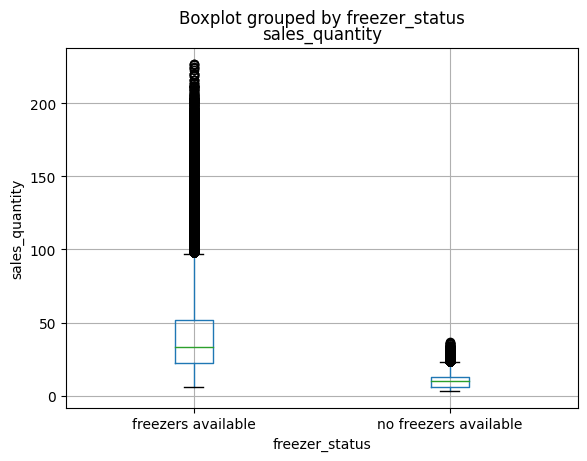

In [178]:
df.boxplot(column='sales_quantity', by='freezer_status')
plt.xlabel('freezer_status')
plt.ylabel('sales_quantity')
# Show the plot
plt.show()

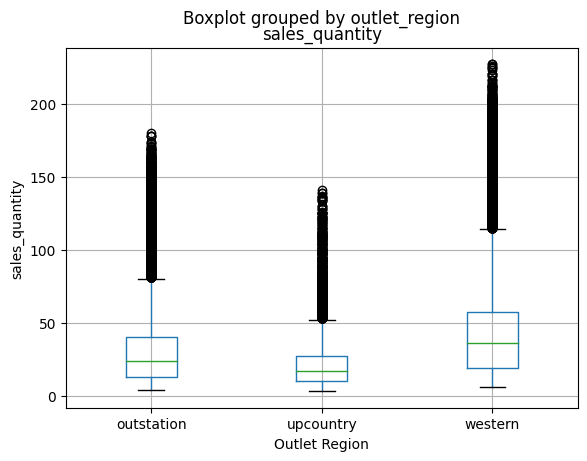

In [179]:
df.boxplot(column='sales_quantity', by='outlet_region')
plt.xlabel('Outlet Region')
plt.ylabel('sales_quantity')

# Show the plot
plt.show()

In [180]:
df.describe()

expected_rainfall    outlet_code  sales_quantity
count      113400.000000  113400.000000   113400.000000
mean           63.893157    2100.500000       33.644586
std            48.293180    1212.440877       27.834651
min             0.000000       1.000000        3.000000
25%            27.000000    1050.750000       14.000000
50%            54.000000    2100.500000       26.000000
75%            87.000000    3150.250000       44.000000
max           199.000000    4200.000000      227.000000

# **Identify the outlier**
This plot is complitely left hand side so  definetly it has outliers

<ipython-input-181-688a9da66141>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='sales_quantity', ylabel='Density'>

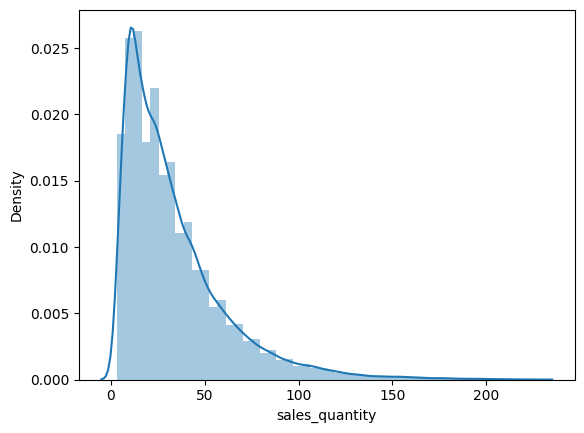

In [181]:
sns.distplot(df['sales_quantity'])

<Axes: >

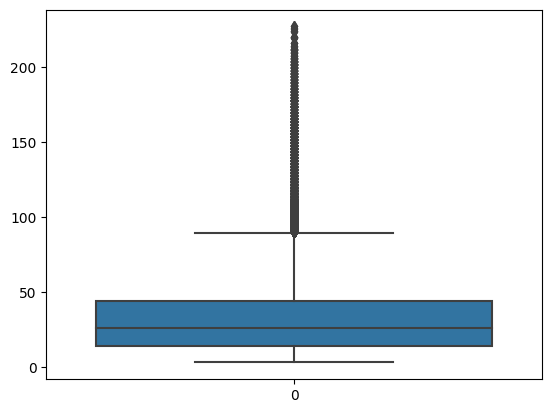

In [182]:
#to see the outliers
sns.boxplot(df['sales_quantity'])

##Z-score method

In [183]:
#find the limit
upper_limit = df['sales_quantity'].mean() + 3*df['sales_quantity'].std()
lower_limit = df['sales_quantity'].mean() - 3*df['sales_quantity'].std()
print("upper limit:", upper_limit)
print("lower limit:", lower_limit)

upper limit: 117.14853855874611
lower limit: -49.85936748290837


In [184]:
#find the outliers
df.loc[(df['sales_quantity'] > upper_limit) | (df['sales_quantity'] < lower_limit)]

week_start_date  expected_rainfall      freezer_status outlet_region  \
15          2023-07-03                 25  freezers available    outstation   
19          2023-06-12                 67  freezers available    outstation   
35          2023-06-26                 15  freezers available    outstation   
45          2023-07-03                 13  freezers available    outstation   
50          2023-06-19                 68  freezers available    outstation   
...                ...                ...                 ...           ...   
113209      2023-06-19                 23  freezers available       western   
113211      2023-06-19                 39  freezers available       western   
113212      2023-06-12                 16  freezers available       western   
113221      2023-06-12                 67  freezers available       western   
113230      2023-06-05                140  freezers available       western   

        outlet_code  sales_quantity  
15             2998             124  
19             2574             124  
35              263             138  
45              869             150  
50             2528             134  
...             ...             ...  
113209          407             127  
113211         2520             185  
113212         3573             125  
113221         3975             148  
113230         1636             153  

[2076 rows x 6 columns]

In [185]:
#trimming -  delete the outlier data
new_df1= df.loc[(df['sales_quantity'] <= upper_limit) & (df['sales_quantity'] >= lower_limit)]
print('before removing outliers:',len(df))
print('after removing outliers:',len(new_df1))
print('outlier:',len(df)-len(new_df1))

before removing outliers: 113400
after removing outliers: 111324
outlier: 2076


<Axes: >

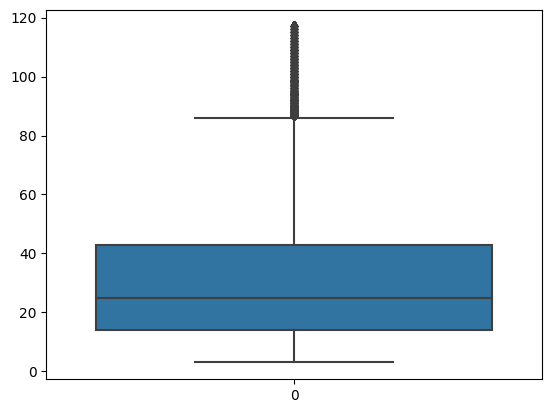

In [186]:
sns.boxplot(new_df1['sales_quantity'])

In [187]:
#capping - change the outlier values to upper (or) lower limit values
new_df1 = df.copy()
new_df1.loc[new_df1['sales_quantity']>=upper_limit, 'sales_quantity'] = upper_limit
new_df1.loc[new_df1['sales_quantity']<=lower_limit, 'sales_quantity'] = lower_limit

<Axes: >

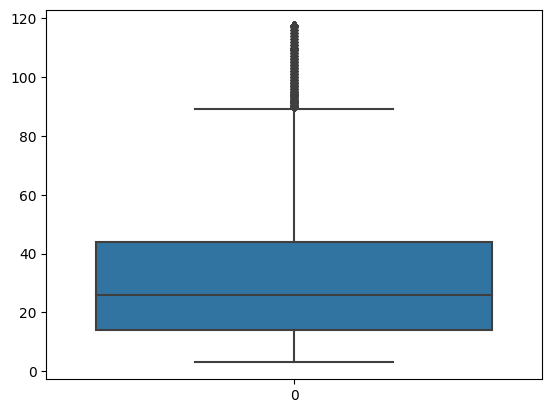

In [188]:
sns.boxplot(new_df1['sales_quantity'])

In [189]:
len(new_df1)

113400

<ipython-input-190-f2ffecbe99e1>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='sales_quantity', ylabel='Density'>

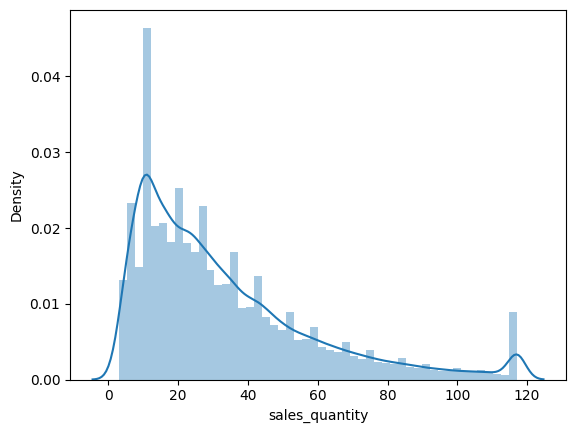

In [190]:
sns.distplot(new_df1['sales_quantity'])

## IQR method

In [191]:
q1 = df['sales_quantity'].quantile(0.25)
q3 = df['sales_quantity'].quantile(0.75)
iqr = q3-q1

In [192]:
q1,q3,iqr

(14.0, 44.0, 30.0)

In [193]:
upper_limit=q3 + (1.5 * iqr)
lower_limit=q1- (1.5 * iqr)
upper_limit,lower_limit

(89.0, -31.0)

<Axes: >

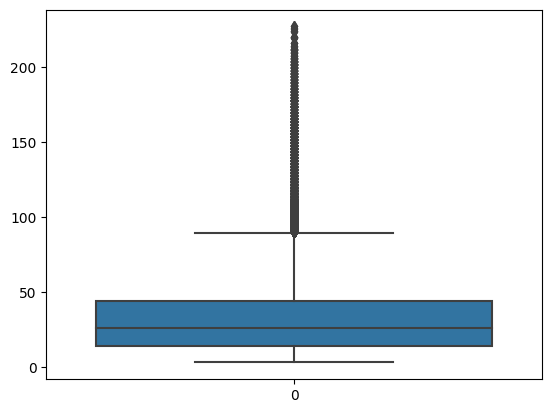

In [194]:
sns.boxplot(df['sales_quantity'])

In [195]:
#find the outliers
df.loc[(df['sales_quantity'] > upper_limit) | (df['sales_quantity'] < lower_limit)]

week_start_date  expected_rainfall      freezer_status outlet_region  \
0           2023-05-22                 57  freezers available    outstation   
1           2023-05-29                  8  freezers available    outstation   
3           2023-05-22                 37  freezers available    outstation   
13          2023-05-29                 77  freezers available    outstation   
15          2023-07-03                 25  freezers available    outstation   
...                ...                ...                 ...           ...   
113297      2023-06-19                 25  freezers available       western   
113303      2023-06-26                 11  freezers available       western   
113323      2023-06-19                 63  freezers available       western   
113357      2023-06-12                 11  freezers available       western   
113371      2023-06-26                  7  freezers available       western   

        outlet_code  sales_quantity  
0              3254              95  
1              1859             107  
3              1459             106  
13              670              95  
15             2998             124  
...             ...             ...  
113297         2228              91  
113303         3819             104  
113323         1157             100  
113357          790             102  
113371          952             109  

[5586 rows x 6 columns]

In [196]:
#trimming -  delete the outlier data
new_df2= df.loc[(df['sales_quantity'] <= upper_limit) & (df['sales_quantity'] >= lower_limit)]
print('before removing outliers:',len(df))
print('after removing outliers:',len(new_df2))
print('outlier:',len(df)-len(new_df2))

before removing outliers: 113400
after removing outliers: 107814
outlier: 5586


In [197]:
#capping - change the outlier values to upper (or) lower limit values
new_df2 = df.copy()
new_df2.loc[new_df2['sales_quantity']>=upper_limit, 'sales_quantity'] = upper_limit
new_df2.loc[new_df2['sales_quantity']<=lower_limit, 'sales_quantity'] = lower_limit

<Axes: >

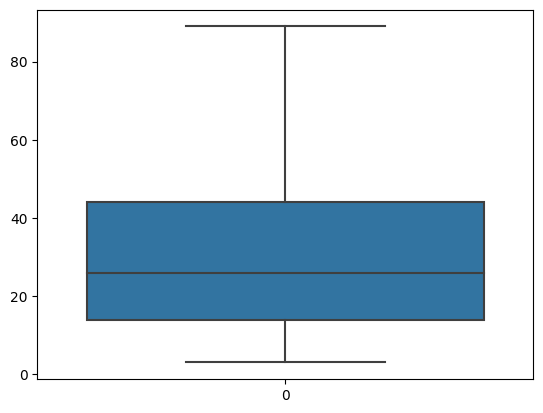

In [198]:
sns.boxplot(new_df2['sales_quantity'])

In [199]:
len(new_df2)

113400

<ipython-input-200-3b7f53d5112f>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='sales_quantity', ylabel='Density'>

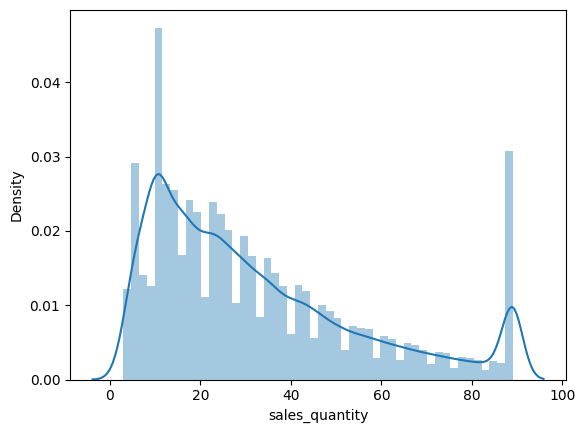

In [200]:
sns.distplot(new_df2['sales_quantity'])

## Percentile method

In [201]:
upper_limit = df['sales_quantity'].quantile(0.99)
lower_limit = df['sales_quantity'].quantile(0.01)
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 135.0
lower limit: 4.0


<Axes: >

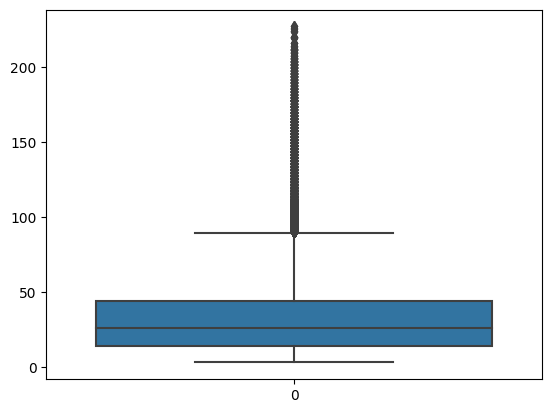

In [202]:
sns.boxplot(df['sales_quantity'])

In [203]:
#find the outliers
df.loc[(df['sales_quantity'] > upper_limit) | (df['sales_quantity'] < lower_limit)]

week_start_date  expected_rainfall         freezer_status  \
35          2023-06-26                 15     freezers available   
45          2023-07-03                 13     freezers available   
265         2023-01-23                191  no freezers available   
271         2023-03-20                117  no freezers available   
274         2023-01-23                171  no freezers available   
...                ...                ...                    ...   
113206      2023-07-03                 47     freezers available   
113208      2023-05-29                 36     freezers available   
113211      2023-06-19                 39     freezers available   
113221      2023-06-12                 67     freezers available   
113230      2023-06-05                140     freezers available   

       outlet_region  outlet_code  sales_quantity  
35        outstation          263             138  
45        outstation          869             150  
265        upcountry          231               3  
271        upcountry          140               3  
274        upcountry         1499               3  
...              ...          ...             ...  
113206       western          333             194  
113208       western         1611             142  
113211       western         2520             185  
113221       western         3975             148  
113230       western         1636             153  

[1806 rows x 6 columns]

In [204]:
#trimming -  delete the outlier data
new_df3= df.loc[(df['sales_quantity'] <= upper_limit) & (df['sales_quantity'] >= lower_limit)]
print('before removing outliers:',len(df))
print('after removing outliers:',len(new_df3))
print('outlier:',len(df)-len(new_df3))

before removing outliers: 113400
after removing outliers: 111594
outlier: 1806


In [205]:
#capping - change the outlier values to upper (or) lower limit values
new_df3 = df.copy()
new_df3.loc[new_df3['sales_quantity']>=upper_limit, 'sales_quantity'] = upper_limit
new_df3.loc[new_df3['sales_quantity']<=lower_limit, 'sales_quantity'] = lower_limit

<Axes: >

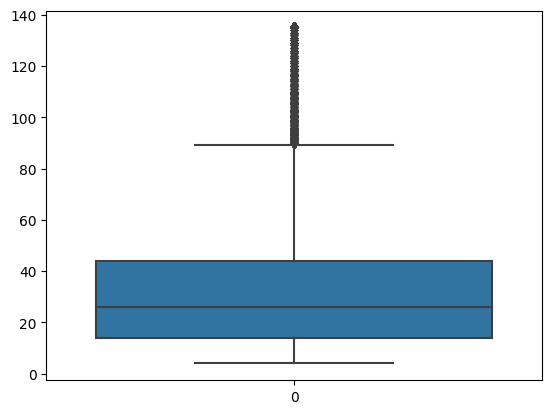

In [206]:
sns.boxplot(new_df3['sales_quantity'])

In [207]:
len(new_df3)

113400

<ipython-input-208-d205c037dc8b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='sales_quantity', ylabel='Density'>

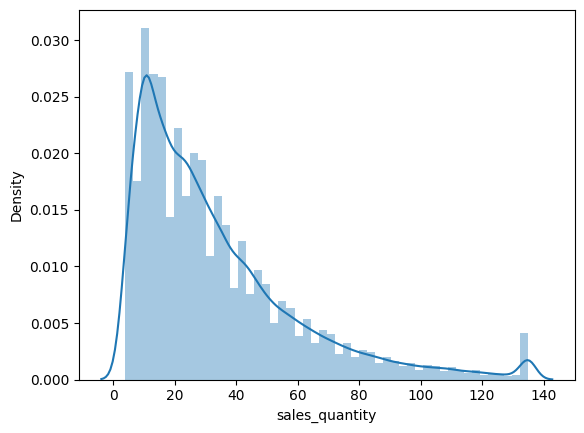

In [208]:
sns.distplot(new_df3['sales_quantity'])

<ipython-input-209-3f0dbccf02d9>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-209-3f0dbccf02d9>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-209-3f0dbccf02d9>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

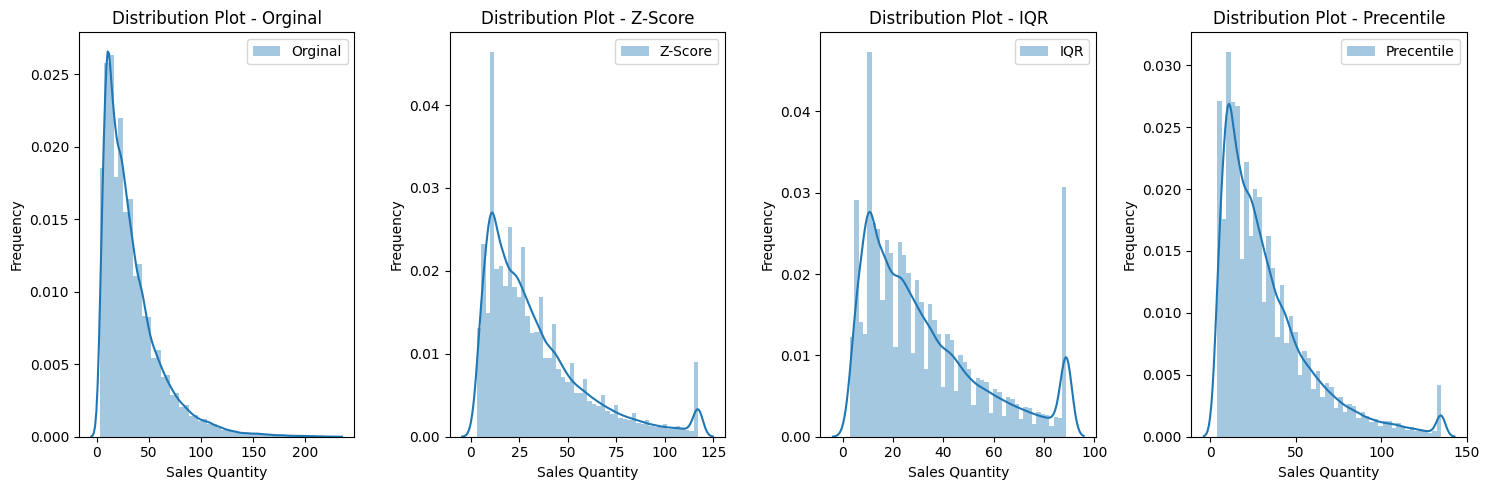

In [209]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot the distribution plots on each subplot
sns.distplot(df['sales_quantity'], ax=axes[0], kde=True, label='Orginal')
sns.distplot(new_df1['sales_quantity'], ax=axes[1], kde=True, label='Z-Score')
sns.distplot(new_df2['sales_quantity'], ax=axes[2], kde=True, label='IQR')
sns.distplot(new_df3['sales_quantity'], ax=axes[3], kde=True, label='Precentile')

# Set labels and title
axes[0].set_xlabel('Sales Quantity')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution Plot - Orginal')

axes[1].set_xlabel('Sales Quantity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution Plot - Z-Score')

axes[2].set_xlabel('Sales Quantity')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution Plot - IQR')

axes[3].set_xlabel('Sales Quantity')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Distribution Plot - Precentile')

# Add legend
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Use IQR method for outliers

##Lable encording

In [210]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

##encode freezers available =0 and no-freezers available=1
new_df1['freezer_status'] = le.fit_transform(new_df1['freezer_status'])
new_df1

week_start_date  expected_rainfall  freezer_status outlet_region  \
0           2023-05-22                 57               0    outstation   
1           2023-05-29                  8               0    outstation   
2           2023-05-08                170               0    outstation   
3           2023-05-22                 37               0    outstation   
4           2023-03-27                  7               0    outstation   
...                ...                ...             ...           ...   
113395      2023-04-24                 61               0       western   
113396      2023-02-20                 10               0       western   
113397      2023-06-05                 98               0       western   
113398      2023-06-05                120               0       western   
113399      2023-05-01                 48               0       western   

        outlet_code  sales_quantity  
0              3254            95.0  
1              1859           107.0  
2              4176            83.0  
3              1459           106.0  
4                38            43.0  
...             ...             ...  
113395         2946            27.0  
113396         3671            36.0  
113397         3671            76.0  
113398         2618            76.0  
113399         1163            30.0  

[113400 rows x 6 columns]

In [211]:
new_df1['outlet_region'].unique()

array(['outstation', 'upcountry', 'western'], dtype=object)

In [212]:
ordinal_mapping = {'outstation': 1, 'upcountry': 2, 'western': 3}
new_df1['outlet_region'] = new_df1['outlet_region'].map(ordinal_mapping)

In [213]:
new_df1

week_start_date  expected_rainfall  freezer_status  outlet_region  \
0           2023-05-22                 57               0              1   
1           2023-05-29                  8               0              1   
2           2023-05-08                170               0              1   
3           2023-05-22                 37               0              1   
4           2023-03-27                  7               0              1   
...                ...                ...             ...            ...   
113395      2023-04-24                 61               0              3   
113396      2023-02-20                 10               0              3   
113397      2023-06-05                 98               0              3   
113398      2023-06-05                120               0              3   
113399      2023-05-01                 48               0              3   

        outlet_code  sales_quantity  
0              3254            95.0  
1              1859           107.0  
2              4176            83.0  
3              1459           106.0  
4                38            43.0  
...             ...             ...  
113395         2946            27.0  
113396         3671            36.0  
113397         3671            76.0  
113398         2618            76.0  
113399         1163            30.0  

[113400 rows x 6 columns]

##correlation

In [214]:
import plotly.express as px

In [215]:
fig = px.scatter_matrix(df, width=1200, height=1200)
fig.update_layout(font_size = 8)
fig.show()

In [216]:
df.corr()

<ipython-input-216-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



expected_rainfall  outlet_code  sales_quantity
expected_rainfall           1.000000     0.001255       -0.093707
outlet_code                 0.001255     1.000000        0.010736
sales_quantity             -0.093707     0.010736        1.000000

##Model

In [217]:
train_data=new_df1.drop(['expected_rainfall'],axis=1)

In [218]:
train_data

week_start_date  freezer_status  outlet_region  outlet_code  \
0           2023-05-22               0              1         3254   
1           2023-05-29               0              1         1859   
2           2023-05-08               0              1         4176   
3           2023-05-22               0              1         1459   
4           2023-03-27               0              1           38   
...                ...             ...            ...          ...   
113395      2023-04-24               0              3         2946   
113396      2023-02-20               0              3         3671   
113397      2023-06-05               0              3         3671   
113398      2023-06-05               0              3         2618   
113399      2023-05-01               0              3         1163   

        sales_quantity  
0                 95.0  
1                107.0  
2                 83.0  
3                106.0  
4                 43.0  
...                ...  
113395            27.0  
113396            36.0  
113397            76.0  
113398            76.0  
113399            30.0  

[113400 rows x 5 columns]

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [220]:
y=train_data['sales_quantity']

In [221]:
feature= ['freezer_status',	'outlet_region','outlet_code']

In [222]:
X = train_data[feature]

In [223]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [224]:
first_model = DecisionTreeRegressor(random_state=1)

In [225]:
first_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [226]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [227]:
val_predictions = first_model.predict(val_X)
val_mape = mean_absolute_percentage_error(val_y,val_predictions)
print("Validation MAPE when not specifying max_leaf_nodes: {:,.0f}".format(val_mape))

Validation MAPE when not specifying max_leaf_nodes: 48


In [228]:
rf_model_on_full_data = RandomForestRegressor(random_state=1)

In [229]:
rf_model_on_full_data.fit(train_X,train_y)

RandomForestRegressor(random_state=1)

In [230]:
RandomForestRegressor(random_state=1)

RandomForestRegressor(random_state=1)

In [231]:
test_data = pd.read_csv("/content/test.csv")

In [232]:
test_data['freezer_status'].replace(['  freezers available ', ' no freezers available ', ' freezers available ', '   freezers available '],['freezers available', 'no freezers available', 'freezers available', 'freezers available'], inplace=True)

In [233]:
test_data['freezer_status'] = le.fit_transform(test_data['freezer_status'])

In [234]:
test_data['outlet_region'] = test_data['outlet_region'].map(ordinal_mapping)

In [235]:
test_data['outlet_code'] = test_data['outlet_code'].str.replace('outlet_code_', '')
test_data['outlet_code'] = test_data['outlet_code'].astype(int)

In [236]:
test_X = test_data[feature]

In [237]:
test_preds = rf_model_on_full_data.predict(test_X)

In [238]:
index1=test_data['outlet_code']
index1

0          1
1         10
2        100
3       1000
4       1001
        ... 
4195     995
4196     996
4197     997
4198     998
4199     999
Name: outlet_code, Length: 4200, dtype: int64

In [239]:
output = pd.DataFrame({"outlet_code": index1, 'sales_quantity': test_preds})
output = output.sort_values(by='outlet_code')
output.index = 'outlet_code_' + output['outlet_code'].astype(str)
output.drop(columns=['outlet_code'], inplace=True)
output.to_csv("submission_2.csv")
print(output)

                  sales_quantity
outlet_code                     
outlet_code_1          35.985935
outlet_code_2          36.970888
outlet_code_3          32.803514
outlet_code_4          27.106634
outlet_code_5          53.304247
...                          ...
outlet_code_4196       40.993423
outlet_code_4197       40.201446
outlet_code_4198       44.002298
outlet_code_4199       46.887542
outlet_code_4200       50.515641

[4200 rows x 1 columns]


In [240]:
# output = pd.DataFrame({'outlet_code': index1, 'predicted sales': test_preds})
# output.to_csv("submission_1.csv",index=False)
# output